Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


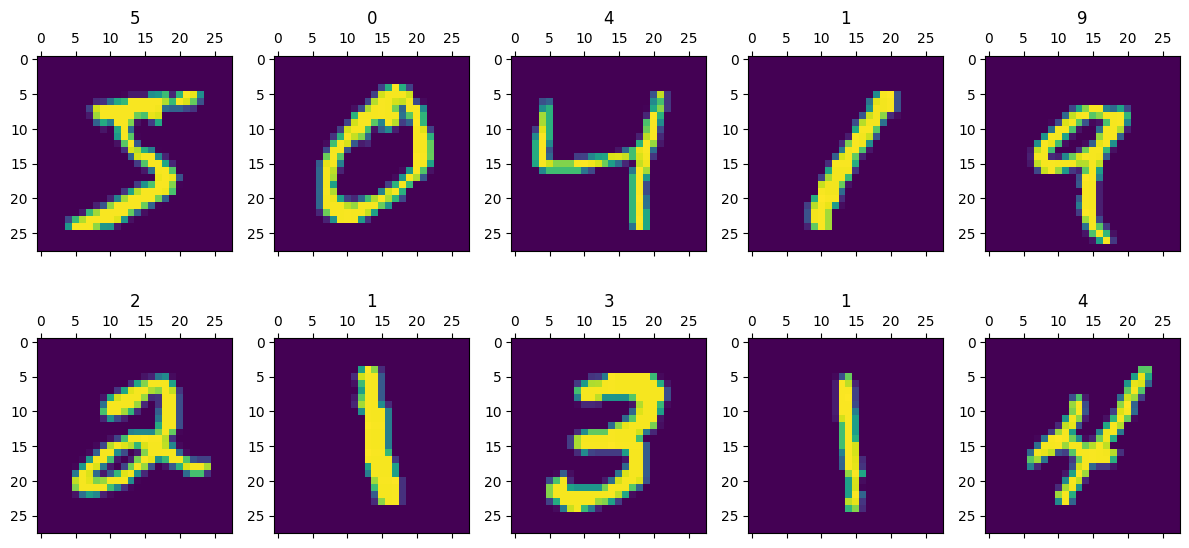

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)
Epoch 1/5
4800/4800 [==============================] - 14s 3ms/step - loss: 0.2511 - Accuracy: 0.9229
Epoch 2/5
4800/4800 [==============================] - 13s 3ms/step - loss: 0.1178 - Accuracy: 0.9641
Epoch 3/5
4800/4800 [==============================] - 13s 3ms/step - loss: 0.0833 - Accuracy: 0.9743
Epoch 4/5
4800/4800 [==============================] - 13s 3ms/step - loss: 0.0677 - Accuracy: 0.9793
Epoch 5/5
313/313 [==============================] - 1s 2ms/step

-------------------- Model Summary --------------------
Model: "DFF-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               100480    
                                                                 
 Hidden-Layer-2 (Dense)      (None, 64)                8256      
                                                  

In [ ]:
#load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import classification_report
import matplotlib
import matplotlib.pyplot as plt
# Load digits data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Print shapes
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
# Display images of the first 10 digits in the training set and their true lables
fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6),
facecolor='white')
n=0
for i in range(0,2):
  for j in range(0,5):
    axs[i,j].matshow(X_train[n])
    axs[i,j].set(title=y_train[n])
    n=n+1
plt.show()
# Reshape and normalize (divide by 255) input data
X_train = X_train.reshape(60000, 784).astype("float32") / 255
X_test = X_test.reshape(10000, 784).astype("float32") / 255
# Print shapes
print("New shape of X_train: ", X_train.shape)
print("New shape of X_test: ", X_test.shape)
#Design the Deep FF Neural Network architecture
model = Sequential(name="DFF-Model") # Model
model.add(Input(shape=(784,), name='Input-Layer')) # Input Layer - need to speicfy the shape of inputs
model.add(Dense(128, activation='relu', name='Hidden-Layer-1',
kernel_initializer='HeNormal'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2',
kernel_initializer='HeNormal'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3',
kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))
#Compile keras model
model.compile(optimizer='adam', loss='SparseCategoricalCrossentropy',
metrics=['Accuracy'], loss_weights=None, weighted_metrics=None, run_eagerly=None,
steps_per_execution=None)
#Fit keras model on the dataset
model.fit(X_train, y_train, batch_size=10, epochs=5, verbose='auto', callbacks=None,
validation_split=0.2, shuffle=True, class_weight=None, sample_weight=None,
initial_epoch=0, # Integer, default=0, Epoch at which to start training (useful for resuming a previous training run).
steps_per_epoch=None, validation_steps=None, validation_batch_size=None,
validation_freq=5, max_queue_size=10, workers=1, use_multiprocessing=False,)
# apply the trained model to make predictions
# Predict class labels on training data
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train),axis=1))
# Predict class labels on a test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test),axis=1))
#Model Performance Summary
print("")
print('-------------------- Model Summary --------------------')
model.summary()
print("")
# Printing the parameters:Deep Feed Forward Neural Network contains more than 100K
#print('-------------------- Weights and Biases --------------------')
#for layer in model_d1.layers:
#print("Layer: ", layer.name) # print layer name
#print(" --Kernels (Weights): ", layer.get_weights()[0]) # kernels (weights)
#print(" --Biases: ", layer.get_weights()[1]) # biases
print("")
print('---------- Evaluation on Training Data ----------')
print(classification_report(y_train, pred_labels_tr))
print("")
print('---------- Evaluation on Test Data ----------')
print(classification_report(y_test, pred_labels_te))
print("")


In [ ]:
# Load required packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
import numpy as np
from sklearn.metrics import accuracy_score

# Load CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Design the Deep FF Neural Network architecture
model = Sequential(name="DFF-Model")
model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input images
model.add(Dense(128, activation='relu', name='Hidden-Layer-1'))
model.add(Dense(64, activation='relu', name='Hidden-Layer-2'))
model.add(Dense(32, activation='relu', name='Hidden-Layer-3'))
model.add(Dense(10, activation='softmax', name='Output-Layer'))  # 10 units for 10 classes

# Compile keras model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit keras model on the dataset
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

# Record accuracy at epochs 5 and 50
acc_at_epoch_5 = history.history['accuracy'][4] * 100  # Multiply by 100 to convert to percentage
acc_at_epoch_50 = history.history['accuracy'][-1] * 100

print("Accuracy at epoch 5: {:.2f}%".format(acc_at_epoch_5))
print("Accuracy at epoch 50: {:.2f}%".format(acc_at_epoch_50))

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", test_accuracy)


Epoch 1/50
1250/1250 [==============================] - 10s 8ms/step - loss: 1.9094 - accuracy: 0.3036 - val_loss: 1.7821 - val_accuracy: 0.3660
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7213 - accuracy: 0.3789 - val_loss: 1.6996 - val_accuracy: 0.3900
Epoch 3/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.6470 - accuracy: 0.4096 - val_loss: 1.7488 - val_accuracy: 0.3868
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5979 - accuracy: 0.4301 - val_loss: 1.6377 - val_accuracy: 0.4234
Epoch 5/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.5594 - accuracy: 0.4419 - val_loss: 1.6014 - val_accuracy: 0.4247
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5343 - accuracy: 0.4499 - val_loss: 1.5630 - val_accuracy: 0.4496
Epoch 7/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5068 - accuracy: 0.4622 - val_loss: 1.5409 - val_accuracy

In [ ]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
model = Sequential()
model.add(Conv2D(256, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(28, (3,3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))
plt.imshow(test_X[0].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

Epoch 1/5
583/938 [=================>............] - ETA: 2:38 - loss: 0.5899 - accuracy: 0.7839

KeyboardInterrupt: 